In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=25, n_features=1, n_informative=1,
                           n_redundant=0, random_state=11, n_clusters_per_class=1,
                           class_sep=0.4)

display(X, y)

array([[-0.86305361],
       [-1.4372011 ],
       [ 0.19592225],
       [-0.87164985],
       [ 0.00982831],
       [ 1.30282593],
       [ 0.16134434],
       [-0.9223264 ],
       [-0.10173176],
       [ 0.41006497],
       [ 0.27129997],
       [-0.71111212],
       [-2.98259876],
       [-0.09300387],
       [ 0.82285659],
       [ 0.16493473],
       [-0.40806382],
       [ 0.62136283],
       [ 0.76258897],
       [-0.11001122],
       [-1.26261842],
       [ 0.04513441],
       [ 0.50026937],
       [-0.6784482 ],
       [ 0.2182344 ]])

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)

(array([1.77635684e-17]), array([1.]))

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model

LogisticRegression()

In [ ]:
model.fit(X, y)

LogisticRegression()

In [ ]:
model_a = model.coef_[0]
model_b = model.intercept_

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

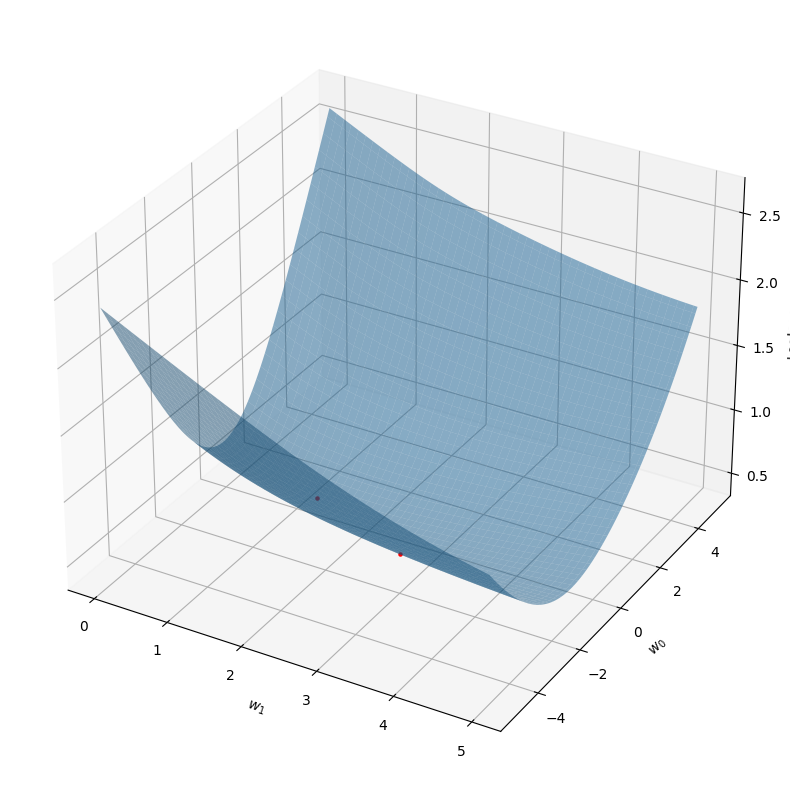

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sklearn.metrics import log_loss

a = 3
b = -2

def logloss(w1, w0):
    y_pred = sigmoid(w1 * X + w0)
    return log_loss(y, y_pred)


coefs_a = np.linspace(0, 5, num=100)
coefs_b = np.linspace(-5, 5, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([logloss(i, j) for i, j in zip(np.ravel(w1), np.ravel(w0))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w1, w0, Z, alpha=.5)
ax.scatter(model_a, model_b, logloss(model_a, model_b), c='r', s=5)
ax.scatter(a, b, logloss(a, b), c='r', s=5)

ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_0$')
ax.set_zlabel('Logloss')

plt.show()

In [ ]:
X

array([[-0.76127322],
       [-1.41869179],
       [ 0.45129046],
       [-0.77111621],
       [ 0.23820651],
       [ 1.71873313],
       [ 0.41169756],
       [-0.82914259],
       [ 0.11046641],
       [ 0.69649121],
       [ 0.53760054],
       [-0.587295  ],
       [-3.1882251 ],
       [ 0.12046015],
       [ 1.16915177],
       [ 0.41580869],
       [-0.2402943 ],
       [ 0.93843451],
       [ 1.10014328],
       [ 0.10098614],
       [-1.21878863],
       [ 0.27863321],
       [ 0.79977834],
       [-0.54989369],
       [ 0.47683863]])

In [ ]:
X = np.c_[np.ones_like(X), X]
X

array([[ 1.        , -0.76127322],
       [ 1.        , -1.41869179],
       [ 1.        ,  0.45129046],
       [ 1.        , -0.77111621],
       [ 1.        ,  0.23820651],
       [ 1.        ,  1.71873313],
       [ 1.        ,  0.41169756],
       [ 1.        , -0.82914259],
       [ 1.        ,  0.11046641],
       [ 1.        ,  0.69649121],
       [ 1.        ,  0.53760054],
       [ 1.        , -0.587295  ],
       [ 1.        , -3.1882251 ],
       [ 1.        ,  0.12046015],
       [ 1.        ,  1.16915177],
       [ 1.        ,  0.41580869],
       [ 1.        , -0.2402943 ],
       [ 1.        ,  0.93843451],
       [ 1.        ,  1.10014328],
       [ 1.        ,  0.10098614],
       [ 1.        , -1.21878863],
       [ 1.        ,  0.27863321],
       [ 1.        ,  0.79977834],
       [ 1.        , -0.54989369],
       [ 1.        ,  0.47683863]])

Let's realize the function:
1. logloss - logistic loss function (cross entropy) $logloss = - \frac{1}{n}\sum (y_i \cdot log(p_i) + (1-y_i) \cdot log(1 - p_i))$


2. gr_logloss is the gradient of the logloss function written in matrix form. $X^{T}(\sigma(XW)-Y)$


If you're curious how it turned out, let me know in the comments of the video.

In [ ]:
def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = -(logloss_0 + logloss_1) / len(y)
    return logloss_total


def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

In [ ]:
test_y     = [1, 0]
test_proba = [0, 1]
logloss(test_y, test_proba), log_loss(test_y, test_proba)

(34.538776394910684, 36.04365338911715)

Итерация: 0
Logloss 0.7809352018720266
Accuracy 0.16
--------------------------------------------------------
Итерация: 80
Logloss 0.5979220700310761
Accuracy 0.84
--------------------------------------------------------
Итерация: 160
Logloss 0.5122672986031042
Accuracy 0.84
--------------------------------------------------------
Итерация: 240
Logloss 0.48223175784563155
Accuracy 0.84
--------------------------------------------------------


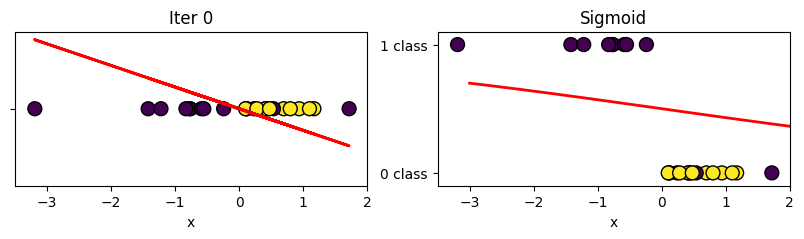

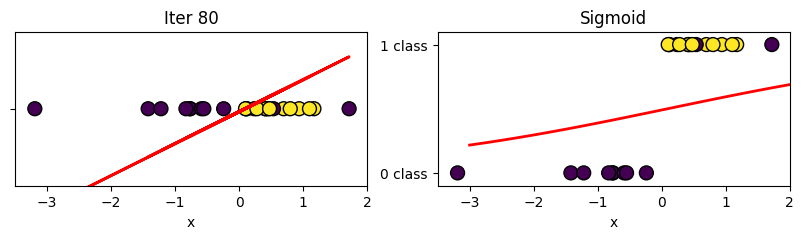

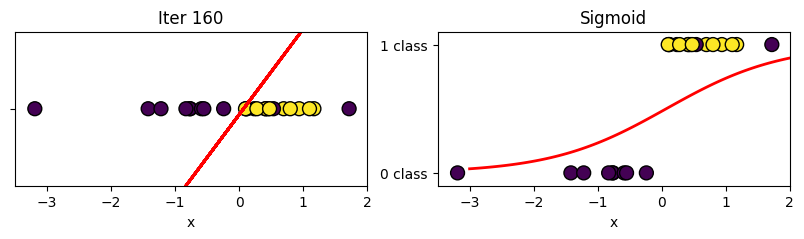

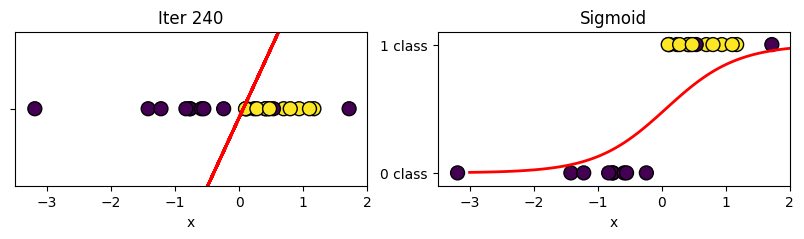

In [ ]:
# setting the minimum value by which the weights should be changed
eps = 0.0001
x = np.linspace(-3, 3, num=100)
# original point
np.random.seed(9)
W = np.random.randn(X.shape[1])

#  (learning rate)
learning_rate = 0.001

next_W = W

# number of iterations
n = 250
for i in range(n):
    cur_W = next_W

    # movement to the negative side of the calculated gradient
    next_W = cur_W - learning_rate * gr_logloss(X, W, y)

    # stop when the required degree of accuracy has been reached
    if np.linalg.norm(cur_W - next_W) <= eps:
        break

    if i % 80 == 0:
        print(f"Итерация: {i}")
        # print(f"Current point {cur_W}| Next point {next_W}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print("--------------------------------------------------------")

        model_grad = next_W @ X.T
        plt.figure(figsize=(10, 2))

        plt.subplot(121)
        plt.plot(X[:, 1], model_grad, linewidth=2, c='r', label='gradient')
        plt.scatter(X[:, 1], np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
        plt.ylabel('');plt.xlabel('x')
        plt.yticks(np.arange(0, 1), [''])
        plt.title(f'Iter {i}')
        plt.ylim(-1, 1);plt.xlim(-3.5, 2);


        plt.subplot(122)
        x_ones = np.c_[np.ones_like(x), x]
        model_pred_x = next_W @ x_ones.T

        plt.plot(x, sigmoid(model_pred_x), linewidth=2, c='r')
        plt.scatter(X[:, 1], sigmoid(model_grad) >= 0.5, c=y, s=100, edgecolors='black')
        plt.ylabel('');plt.xlabel('x')
        plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
        plt.ylim(-0.1, 1.1);plt.xlim(-3.5, 2)
        plt.title('Sigmoid');

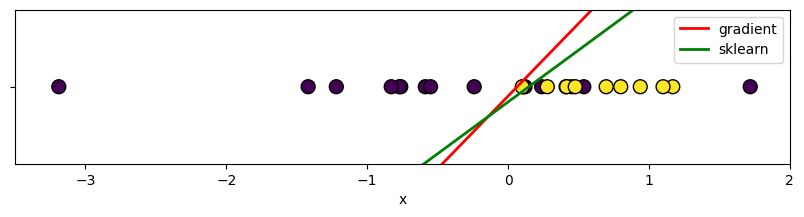

In [ ]:
model_grad = next_W[1] * x + next_W[0]
model_y_sk = model_a * x + model_b

plt.figure(figsize=(10, 2))
plt.plot(x, model_grad, linewidth=2, c='r', label='gradient')
plt.plot(x, model_y_sk, linewidth=2, c='g', label='sklearn')
plt.scatter(X[:, 1], np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.legend()
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

In [ ]:
y_proba = sigmoid(X @ next_W)
y_proba

array([0.17397633, 0.05746958, 0.67451307, 0.17132527, 0.58100106,
       0.95765024, 0.65791435, 0.15634526, 0.52149209, 0.76692197,
       0.70918156, 0.22624161, 0.00216344, 0.52619232, 0.88916558,
       0.65965685, 0.36000043, 0.83851398, 0.87567825, 0.51702983,
       0.08163167, 0.59943501, 0.79991558, 0.23882479, 0.68499901])

In [ ]:
np.where(y_proba > 0.5, 1, 0)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1])

# Multivariate logistic regression








In [ ]:
X, y = make_classification(n_samples=50, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=11)

display(X, y)

array([[-0.58426249, -0.26304715],
       [-0.87385157,  0.03334535],
       [-0.83376357,  0.56089118],
       [-0.36054172,  1.23330648],
       [-0.96996002, -0.51336961],
       [ 0.87096085, -1.33644586],
       [ 0.88714034, -0.49693129],
       [-0.97267638,  1.8062936 ],
       [-1.56089158,  0.81454957],
       [ 1.05054058, -1.36505594],
       [ 0.9851866 , -0.87000251],
       [ 1.55985218,  2.83593357],
       [ 0.93879173, -0.6224016 ],
       [ 0.33585538,  0.73504779],
       [-0.93897517,  1.18220327],
       [-0.88659662, -0.73309719],
       [-0.89879515, -1.59444315],
       [ 1.09571977,  2.02411724],
       [-1.59503021, -0.40847071],
       [-1.17747512,  0.84767099],
       [-1.21644763, -1.06794308],
       [-1.04836107, -0.67305344],
       [-0.94654293, -0.87003831],
       [-0.79154717, -0.19781098],
       [ 0.94786239,  2.68547589],
       [ 1.25268747,  0.85946774],
       [-1.21287477, -1.06611934],
       [ 1.0820104 , -0.72574433],
       [ 3.08649247,

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0])

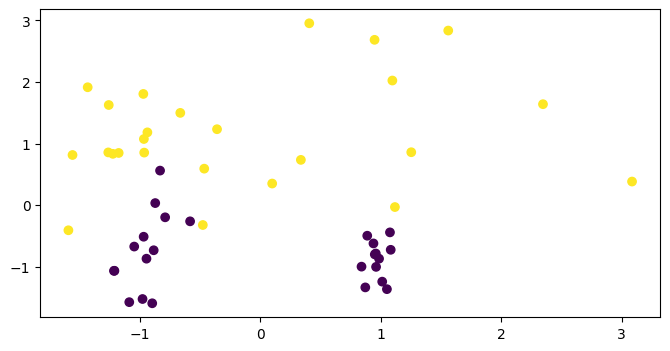

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y);

In [ ]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
model.coef_, model.intercept_

(array([[0.02774742, 2.37815401]]), array([-0.10805746]))

In [ ]:
model.predict(X[:1])

array([0])

In [ ]:
np.sum(model.coef_ * X[0]) + model.intercept_

array([-0.74983587])

In [ ]:
df = pd.DataFrame(X)
df['y'] = y
df['pred_cl'] = model.predict(X)
df['pred_proba'] = sigmoid(X.dot(model.coef_.T) + model.intercept_)

df.head()

,0,1,y,pred_cl,pred_proba
0,-0.584262,-0.263047,0,0,0.320857
1,-0.873852,0.033345,0,0,0.486752
2,-0.833764,0.560891,0,1,0.769004
3,-0.360542,1.233306,1,1,0.943477
4,-0.969960,-0.513370,0,0,0.204917


In [ ]:
(df['y'] == df['pred_cl']).mean()

0.92

In [ ]:
model.score(X, y)

0.92

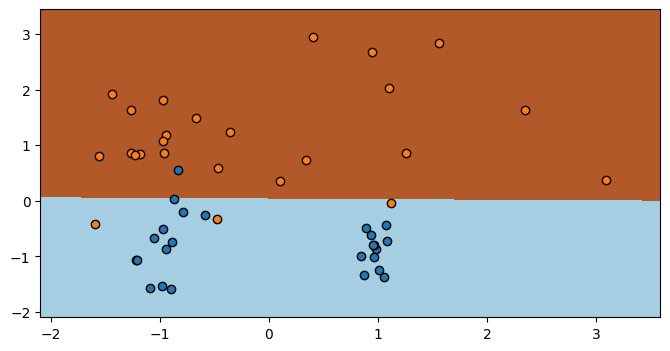

In [ ]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

x_t = np.c_[xx.ravel(),yy.ravel()]

Z = model.predict(x_t)
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8,4))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], edgecolors='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

### Own implementation of logistic regression

In [ ]:
X = np.c_[np.ones(len(X)), X]
X

array([[ 1.        , -0.58426249, -0.26304715],
       [ 1.        , -0.87385157,  0.03334535],
       [ 1.        , -0.83376357,  0.56089118],
       [ 1.        , -0.36054172,  1.23330648],
       [ 1.        , -0.96996002, -0.51336961],
       [ 1.        ,  0.87096085, -1.33644586],
       [ 1.        ,  0.88714034, -0.49693129],
       [ 1.        , -0.97267638,  1.8062936 ],
       [ 1.        , -1.56089158,  0.81454957],
       [ 1.        ,  1.05054058, -1.36505594],
       [ 1.        ,  0.9851866 , -0.87000251],
       [ 1.        ,  1.55985218,  2.83593357],
       [ 1.        ,  0.93879173, -0.6224016 ],
       [ 1.        ,  0.33585538,  0.73504779],
       [ 1.        , -0.93897517,  1.18220327],
       [ 1.        , -0.88659662, -0.73309719],
       [ 1.        , -0.89879515, -1.59444315],
       [ 1.        ,  1.09571977,  2.02411724],
       [ 1.        , -1.59503021, -0.40847071],
       [ 1.        , -1.17747512,  0.84767099],
       [ 1.        , -1.21644763, -1.067

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = -(logloss_0 + logloss_1) / len(y)
    return logloss_total


def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

In [ ]:
def visualize(W):
    x_t_ones = np.c_[np.ones(x_t.shape[0]), x_t]

    y_proba = sigmoid(x_t_ones @ W)
    Z = np.where(y_proba >= 0.5, 1, 0)

    Z = Z.reshape(xx.shape)

    plt.figure(1, figsize=(8,4))
    plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], edgecolors='k')
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], edgecolors='k')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.show()

Итерация: 0
Logloss 2.259021790386789
Accuracy 0.14
--------------------------------------------------------


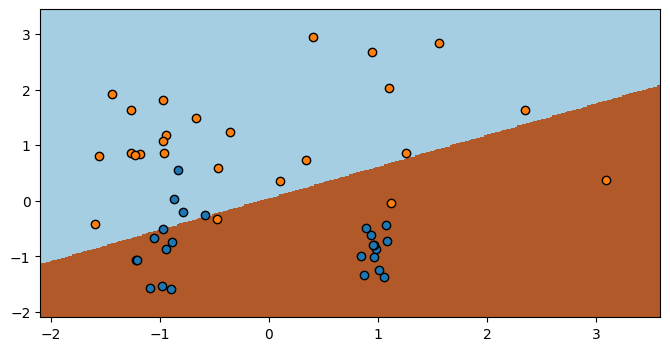

Итерация: 70
Logloss 0.35582201783130835
Accuracy 0.92
--------------------------------------------------------


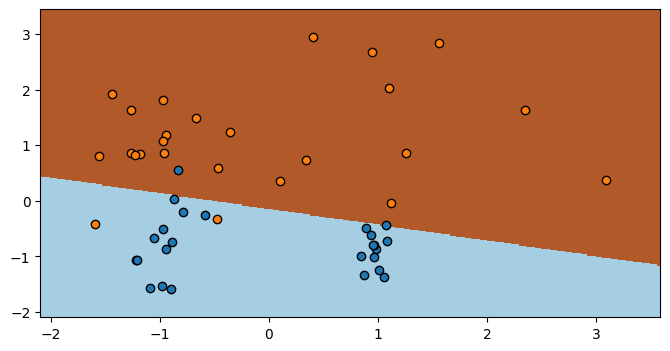

Итерация: 140
Logloss 0.20385651072325695
Accuracy 0.9
--------------------------------------------------------


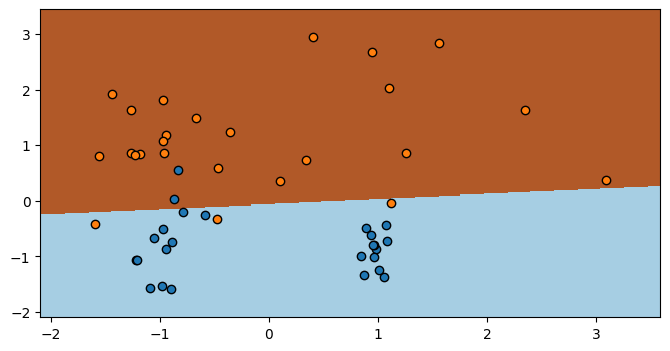

Итерация: 210
Logloss 0.27279613823859705
Accuracy 0.88
--------------------------------------------------------


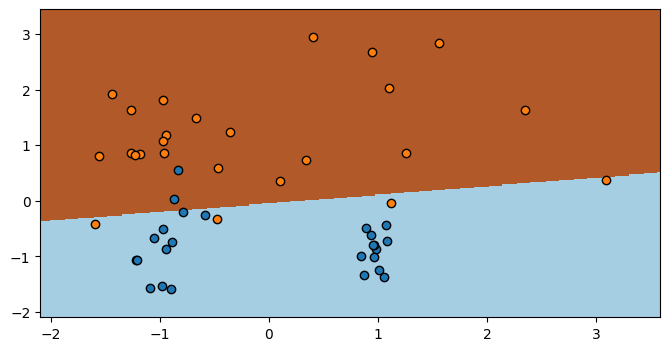

In [ ]:

eps = 0.0001


np.random.seed(8)
W = np.random.randn(X.shape[1])

learning_rate = 0.001

next_W = W

n = 250
for i in range(n):
    cur_W = next_W

    # movement to the negative side of the calculated gradient
    next_W = cur_W - learning_rate * gr_logloss(X, W, y)

    # stop when the required degree of accuracy has been reached
    if np.linalg.norm(cur_W - next_W) <= eps:
        break

    if i % 70 == 0:
        print(f"Итерация: {i}")
        # print(f "Current point {cur_W}| Next point {next_W}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print("--------------------------------------------------------")

        visualize(next_W)

In [ ]:
next_W

array([ 0.38352166, -1.55677194,  9.11878295])

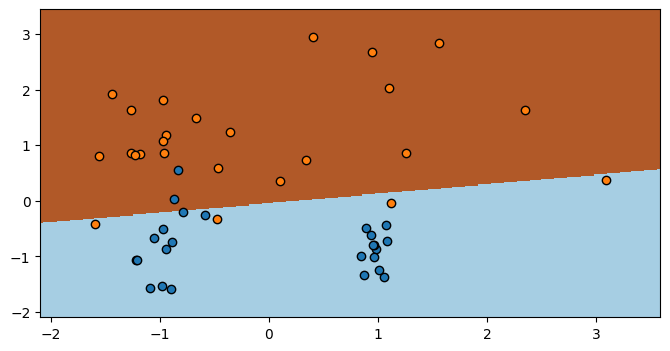

In [ ]:
visualize(next_W)